# Actividad Primer Parcial

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Cargamos los datos

In [2]:
datos = pd.read_excel('C:\\Users\\darkd\\Documents\\Pruebas DA\\Bases/wage2.xls')
# Obtenemos las primeras cinco filas del excel
datos.head()

,wage,hours,IQ,kww,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2,8,8,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,.,14,14,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2,14,14,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3,12,12,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6,6,11,6.331502


Con el objetivo de observar la correlación entre las variables imprimiré un heatmap (mapa de calor), este de igual manera nos sirve para observar cuales definirían de mejor manera nuestra ecuación de regresión. Aunque en este caso unicamente estemos analizando wage (salario) con respecto del IQ

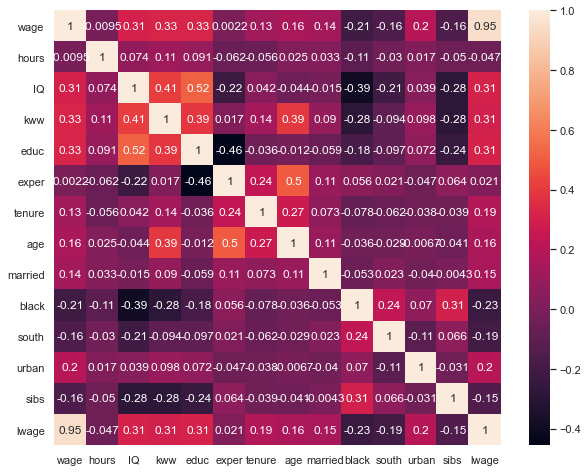

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(datos.corr(), annot=True);

In [4]:
# Extraemos los datos que vamos a ocupar para la regresión
rl_datos = datos[['wage', 'IQ']]

In [5]:
# Obtenemos las métricas de los datos extraídos 
rl_datos.describe()

,wage,IQ
count,935.000000,935.000000
mean,957.945455,101.282353
std,404.360822,15.052636
min,115.000000,50.000000
25%,669.000000,92.000000
50%,905.000000,102.000000
75%,1160.000000,112.000000
max,3078.000000,145.000000


In [6]:
media = rl_datos['IQ'].mean()
desviacion = rl_datos['IQ'].std()
print(f'IQ promedio obtenido: {round(media)}')
print(f'desviación estandar del IQ: {round(desviacion)}')

IQ promedio obtenido: 101
desviación estandar del IQ: 15


### Asignamos las variables
* 'y' como la variable dependiente
* 'x1' como la varible independiente

In [7]:
# En este caso queremos saber cuanto cambia el salario (wage) con respecto del IQ obtenido
y = rl_datos['wage']
x1 = rl_datos['IQ']

### Generamos el modelo de regresión MCO

In [8]:
# Convertimos a x1 (que representa al IQ) en una constante llamada x
x = sm.add_constant(x1)
# Ajustamos el modelo
resultado=sm.OLS(y,x).fit()
# Obtenemos un resumen del modelo
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     98.55
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.79e-22
Time:                        21:40:45   Log-Likelihood:                -6891.4
No. Observations:                 935   AIC:                         1.379e+04
Df Residuals:                     933   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.9916     85.642      1.366      0.172     -51.081     285.064
IQ             8.3031      0.836      9.927      0.000       6.662       9.944
==============================================================================
Omnibus:                      208.281   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.184
Skew:                           1.157   Prob(JB):                    2.74e-116
Kurtosis:                       5.882   Cond. No.                         697.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Grafica del modelo
Los coeficientes que nos interesan son (beta cero) **b0=116.9916** y (beta 1) **b1=8.3031** para definir la ecuación de regresión
#### ¿Que tanto cambia el salario con respecto del IQ?

Text(0.5, 0, 'IQ')

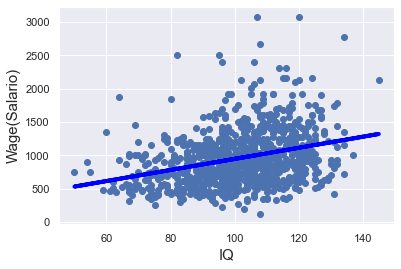

In [9]:
plt.scatter(x1, y)
ygorro = 116.9916 + 8.3031* x1
fig = plt.plot(x1,ygorro,lw=4,c="blue",label='Linea de Regresión' )
plt.ylabel('Wage(Salario)', fontsize=15)
plt.xlabel('IQ', fontsize=15)

In [10]:
yest = ygorro = 116.9916 + 8.3031* 101
print(f'Salario estimado: {round(yest)}')

Salario estimado: 956


Un IQ promedio de 101 nos da un salario estimado de 956, lo que nos lleva a la siguiente pregunta: ¿Que tanto incrementa el salario con respecto a un incremento en el IQ de 15pts?

In [11]:
yincremento_est = ygorro = 116.9916 + 8.3031* 116
print(f'Salario estimado con un incremento de 15pts en el IQ: {round(yincremento_est)}')

Salario estimado con un incremento de 15pts en el IQ: 1080


#### Si cada incremento de 1pt en el IQ representara un incremento de 1% en el salario estimado entonces tenemos que, en el supuesto de que el IQ aumente en 15pts, el salario aumentará por lo tanto en 15%
Como lo veremos a continuación usé el salario estimado (**956**) de acuerdo con el IQ promedio (**101**) como punto de partida para estos incrementos por lo que un un **1%** del salario es igual a **9.56** 

In [12]:
por_ciento = 956*0.01
prom = 956
for n in range(15):
    prom += por_ciento   
print(f'Tenemos un salario estimado de {round(prom)} debido un incremento de {round(((prom/956)-1)*100)}% o 15pts de IQ')

Tenemos un salario estimado de 1099 debido un incremento de 15% o 15pts de IQ
